In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from tqdm import tqdm
from time import time
from scipy.ndimage import gaussian_filter1d
from skimage.morphology import binary_opening, binary_closing, binary_opening

In [2]:
NOTEBOOK_DIR = os.getcwd()
MODULE_DIR, _ = os.path.split(NOTEBOOK_DIR)
sys.path.append(MODULE_DIR)

In [3]:
from longterm import load, utils
from longterm.utils import list_attr, list_fn, list_mthd
from longterm import analysis as an
from longterm.behaviour import synchronisation as sync
from longterm import plot as myplt
from longterm import rois
from longterm.behaviour import optic_flow as of
from longterm.analysis import InterPCAAnalysis, InterPCAAnalysisFromFile

In [4]:
an = reload(an)

In [5]:
fly_dirs = [os.path.join(load.NAS2_DIR_LH, "210722", "fly3"),  # high caff
            os.path.join(load.NAS2_DIR_LH, "210721", "fly3"),  # high caff
            os.path.join(load.NAS2_DIR_LH, "210723", "fly1"),  # low caff
            os.path.join(load.NAS2_DIR_LH, "210723", "fly2")   # high caff
            ]
# all_i_trials = [1,4,5,8,10,12]
# condition = "210722 fly 3 high caff"
# compare_i_trials = [1,4,5,8,10,12]
# thres_rest = 0.01
# thres_walk = 0.03

# trial_names = ["before", "during", "after 3", "after 5", "after 7"]

In [25]:
pcans = [InterPCAAnalysisFromFile(os.path.join(fly_dir, load.PROCESSED_FOLDER, "pcan.pkl")) for fly_dir in fly_dirs]

loading from file:  /mnt/NAS2/LH/210723/fly1/processed/pcan.pkl
loading from file:  /mnt/NAS2/LH/210723/fly2/processed/pcan.pkl


In [26]:
ws = [pcan.pixels_to_image(pcan.get_w_inter_pca_walk_rest_pixels()) for pcan in pcans]

In [9]:
crop_image = np.zeros_like(w)
crop_image[30:300, 40:510] = 1

NameError: name 'w' is not defined

<IPython.core.display.Javascript object>


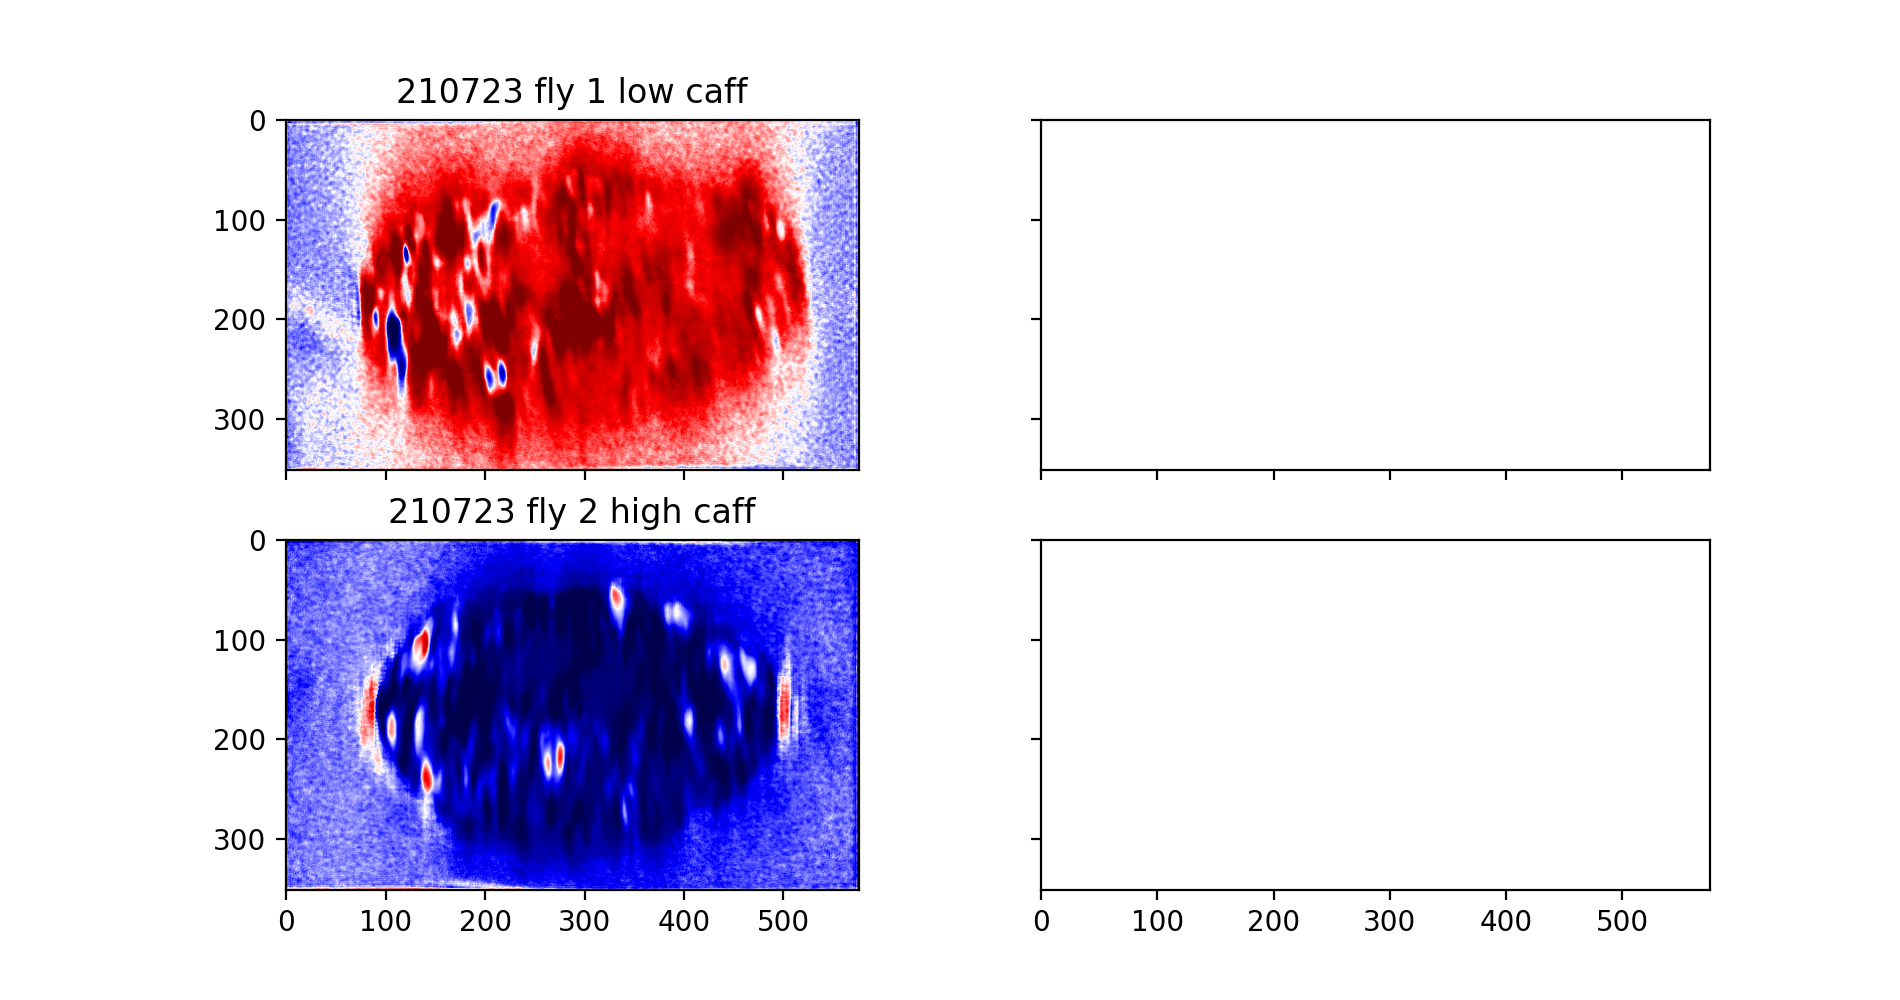

In [27]:
%matplotlib notebook
fig, axs = plt.subplots(2,2, figsize=(9.5, 5), sharex=True, sharey=True)
for i, (w, pcan) in enumerate(zip(ws, pcans)):
    clim = np.quantile(np.abs(w), 0.95)
    axs[i, 0].imshow(w, cmap=plt.cm.get_cmap("seismic"), clim=[-clim, clim])
    axs[i, 0].set_title(pcan.condition)

# axs[1, 0].imshow(crop_image)

In [28]:
_ = [pcan.get_inter_pca_trials_pixels() for pcan in pcans]


In [31]:
[np.mean(r) for r in pcans[1].rest]

[0.20442708333333334,
 0.0,
 0.2125,
 0.03619791666666667,
 0.08125,
 0.20885416666666667]

<IPython.core.display.Javascript object>


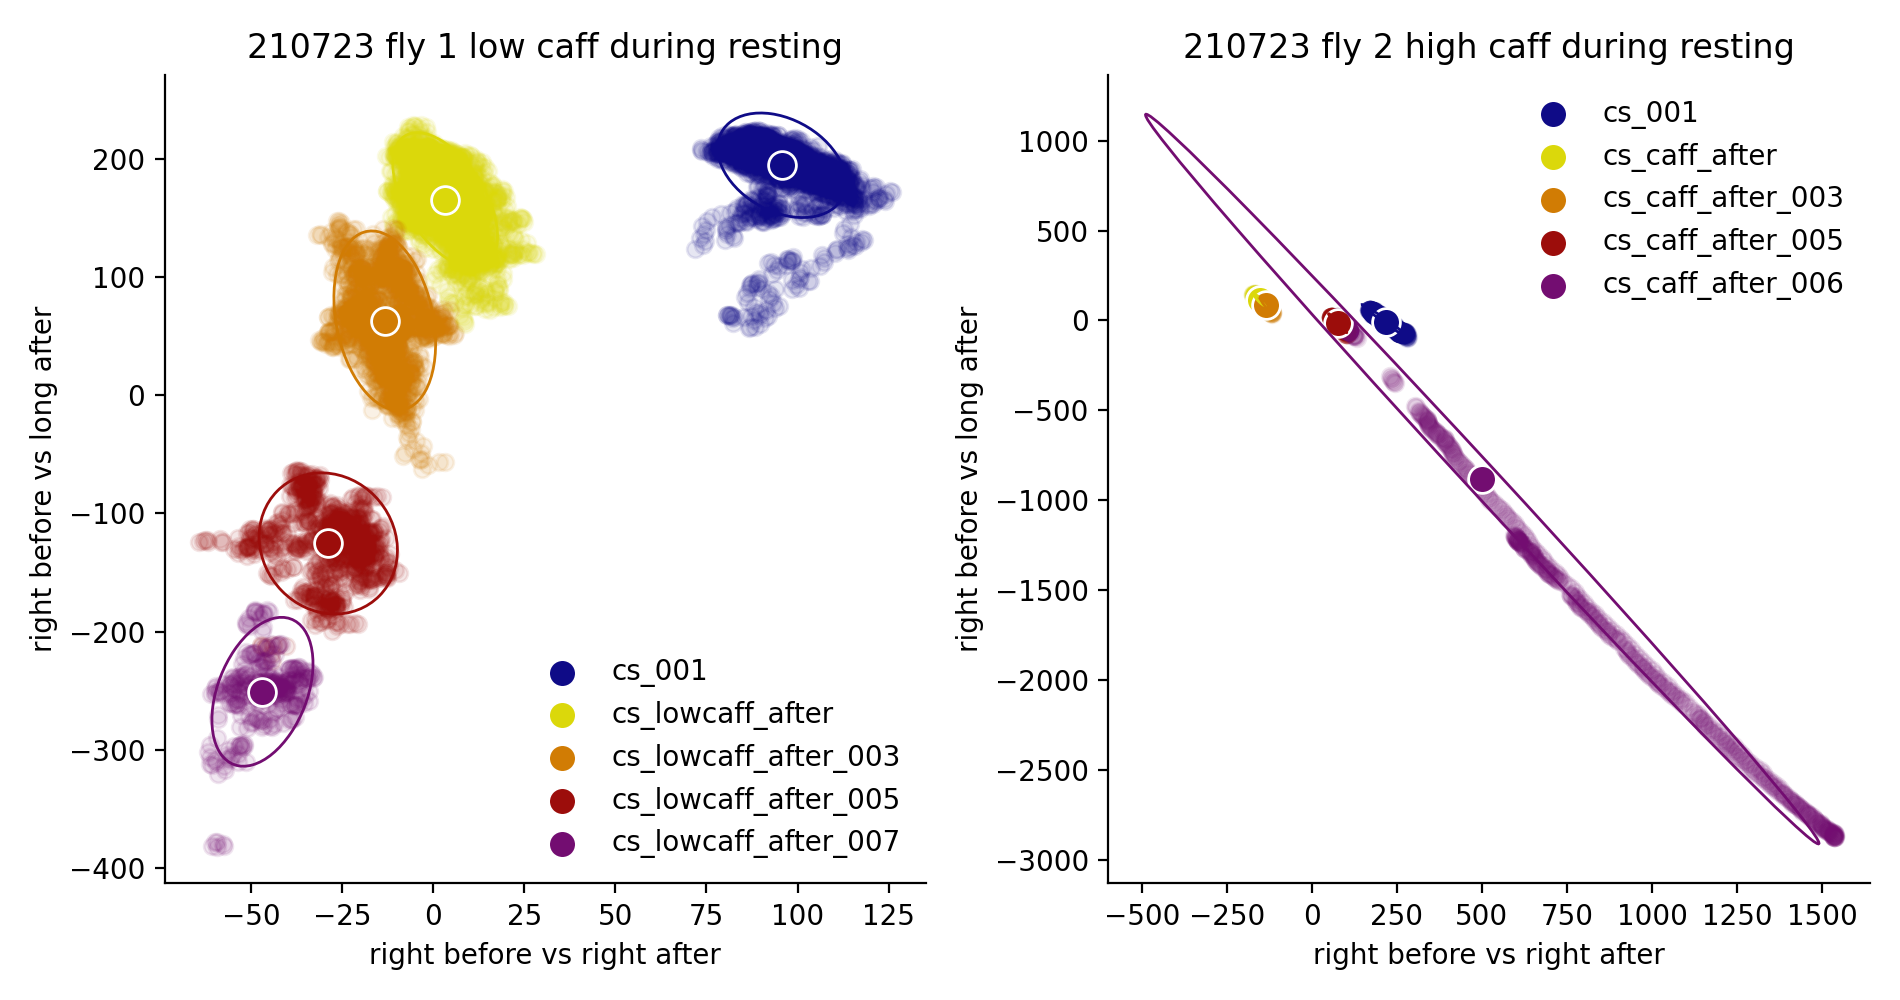

In [41]:
%matplotlib notebook

# colors_long = [myplt.BLACK, myplt.DARKBLUE, myplt.DARKGREEN, myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED]
# colors_contrast_long = [myplt.DARKGRAY, myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN_CONTRAST, myplt.DARKPINK, myplt.DARKPURPLE, myplt.DARKBROWN]
colors_long = [myplt.DARKBLUE, # myplt.DARKGREEN, # myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN, # myplt.DARKGREEN_CONTRAST, 
          myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED, myplt.DARKPURPLE]  # myplt.DARKPINK, 
colors_contrast_long = colors_long
# colors = [myplt.DARKBLUE, myplt.DARKYELLOW, myplt.DARKRED]
# colors_contrast = [myplt.DARKBLUE_CONTRAST,myplt.DARKPINK, myplt.DARKBROWN]
# order = [0,4,1,5,2,3]

fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True, sharex=True)  # , sharex="col", sharey="col")

short_bef = 0
right_aft = 2
med_aft = 3
long_aft = 5
trials = [0,2,3,4, 5]  # 5

for i, pcan in enumerate(pcans):

    an.plot_proj_scatter(w_1=pcan.w_inter_pca_rest_pixels[short_bef,right_aft], w_2=pcan.w_inter_pca_rest_pixels[short_bef,long_aft],
                 X_trials=pcan.pixels_rest, trials=trials, w_names=["right before vs right after", "right before vs long after"],
                 X_names=[name for i_n, name in enumerate(pcan.trial_names) if i_n in trials], 
                 fig=fig, ax=axs[i], alpha=0.1, name=pcan.condition+" during resting",colors=colors_contrast_long)

# fig.suptitle("Inter Condition PCA")
# fig.tight_layout()

<IPython.core.display.Javascript object>


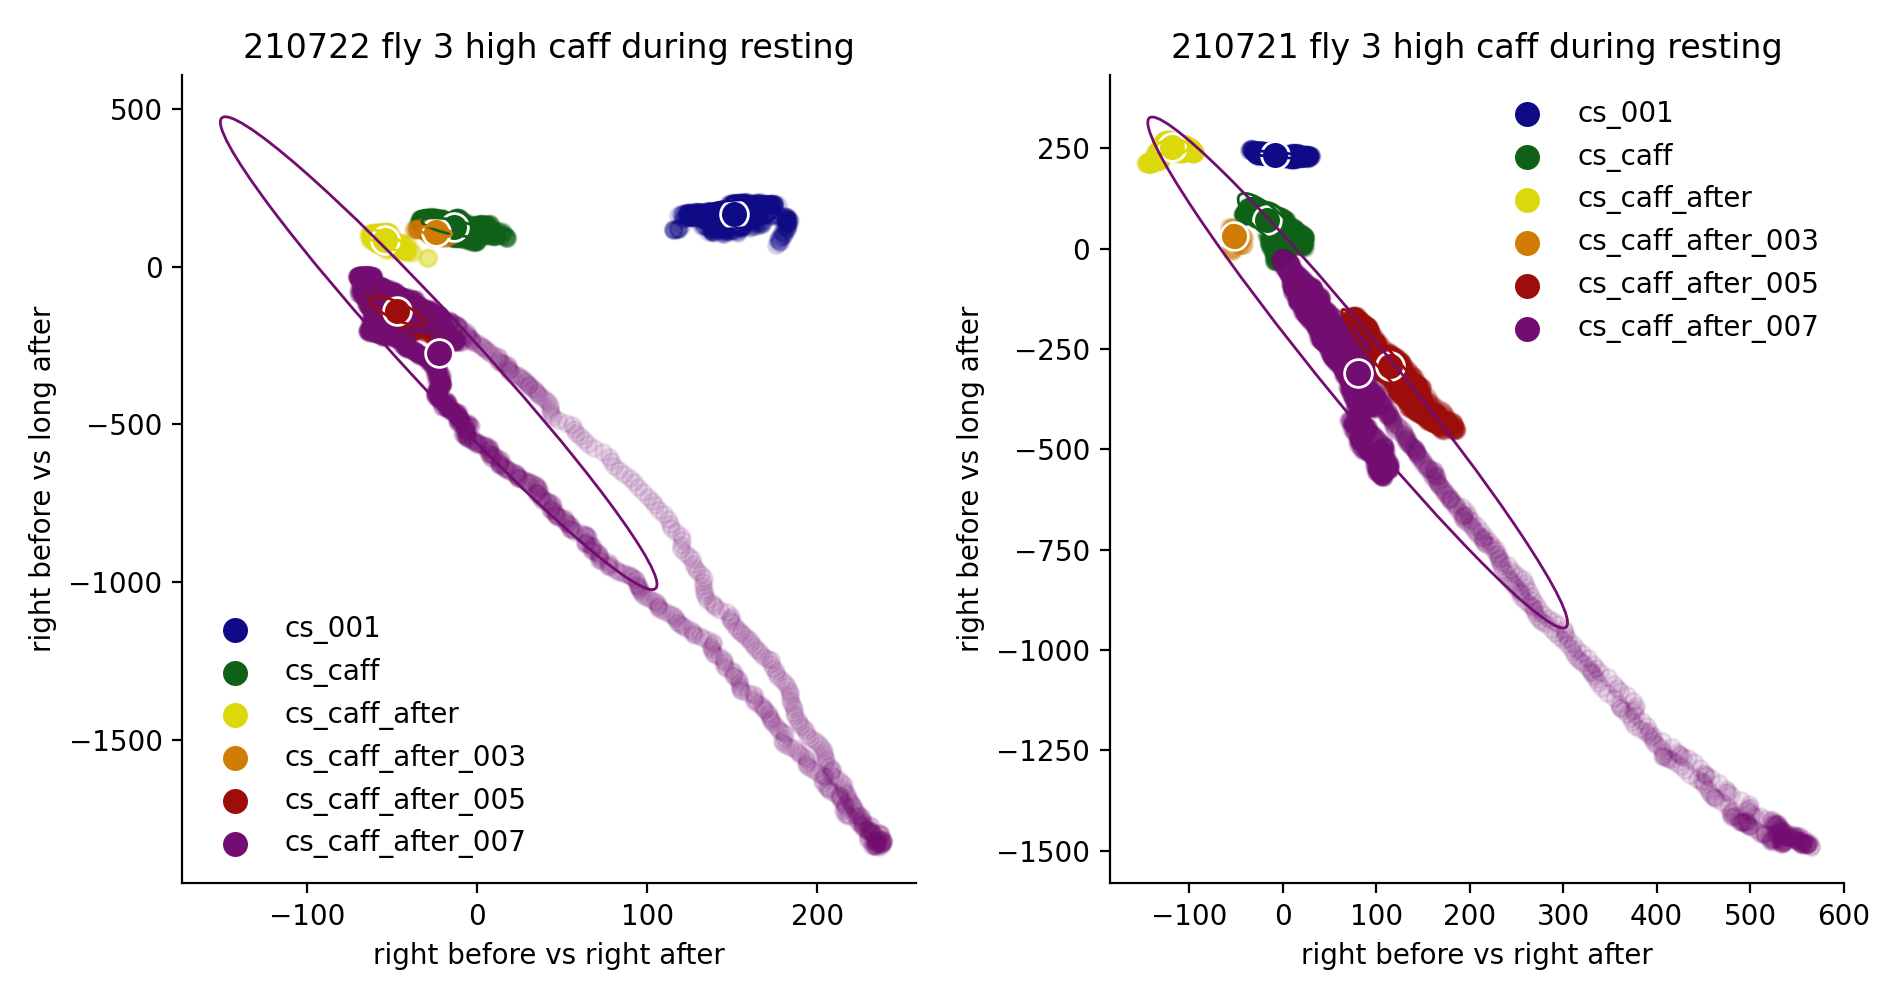

In [18]:
%matplotlib notebook

# colors_long = [myplt.BLACK, myplt.DARKBLUE, myplt.DARKGREEN, myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED]
# colors_contrast_long = [myplt.DARKGRAY, myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN_CONTRAST, myplt.DARKPINK, myplt.DARKPURPLE, myplt.DARKBROWN]
colors_long = [myplt.DARKBLUE, myplt.DARKGREEN, # myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN, # myplt.DARKGREEN_CONTRAST, 
          myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED, myplt.DARKPURPLE]  # myplt.DARKPINK, 
colors_contrast_long = colors_long
# colors = [myplt.DARKBLUE, myplt.DARKYELLOW, myplt.DARKRED]
# colors_contrast = [myplt.DARKBLUE_CONTRAST,myplt.DARKPINK, myplt.DARKBROWN]
# order = [0,4,1,5,2,3]

fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True, sharex=True)  # , sharex="col", sharey="col")

short_bef = 0
right_aft = 2
med_aft = 3
long_aft = 5
trials = [0,1,2,3,4, 5]  # 5

for i, pcan in enumerate(pcans):

    an.plot_proj_scatter(w_1=pcan.w_inter_pca_rest_pixels[short_bef,right_aft], w_2=pcan.w_inter_pca_rest_pixels[short_bef,long_aft],
                 X_trials=pcan.pixels_rest, trials=trials, w_names=["right before vs right after", "right before vs long after"],
                 X_names=pcan.trial_names, 
                 fig=fig, ax=axs[i], alpha=0.1, name=pcan.condition+" during resting",colors=colors_contrast_long)

# fig.suptitle("Inter Condition PCA")
# fig.tight_layout()

In [28]:
pcan.select_pixels(crop_image.flatten().astype(bool))

/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [29]:
start = time()
# pcan.sort_pixels()
# print(time()-start, "done sorting")
# pcan.get_covs_walk_rest_pixels()
# print(time()-start, "done 2")
# pcan.get_covs_inter_trial_pixels()
# print(time()-start, "done 3")
pcan.get_inter_pca_trials_pixels()
print(time()-start, "done")
# pcan.get_inter_condition_variance_ratios_pixels()
# print(time()-start, "done 5")



/home/jbraun/projects/longterm/longterm/analysis/__init__.py:135: RuntimeWarning: Mean of empty slice.
  w = X1.mean(axis=0) - X2.mean(axis=0)


7.869362831115723 done


<IPython.core.display.Javascript object>


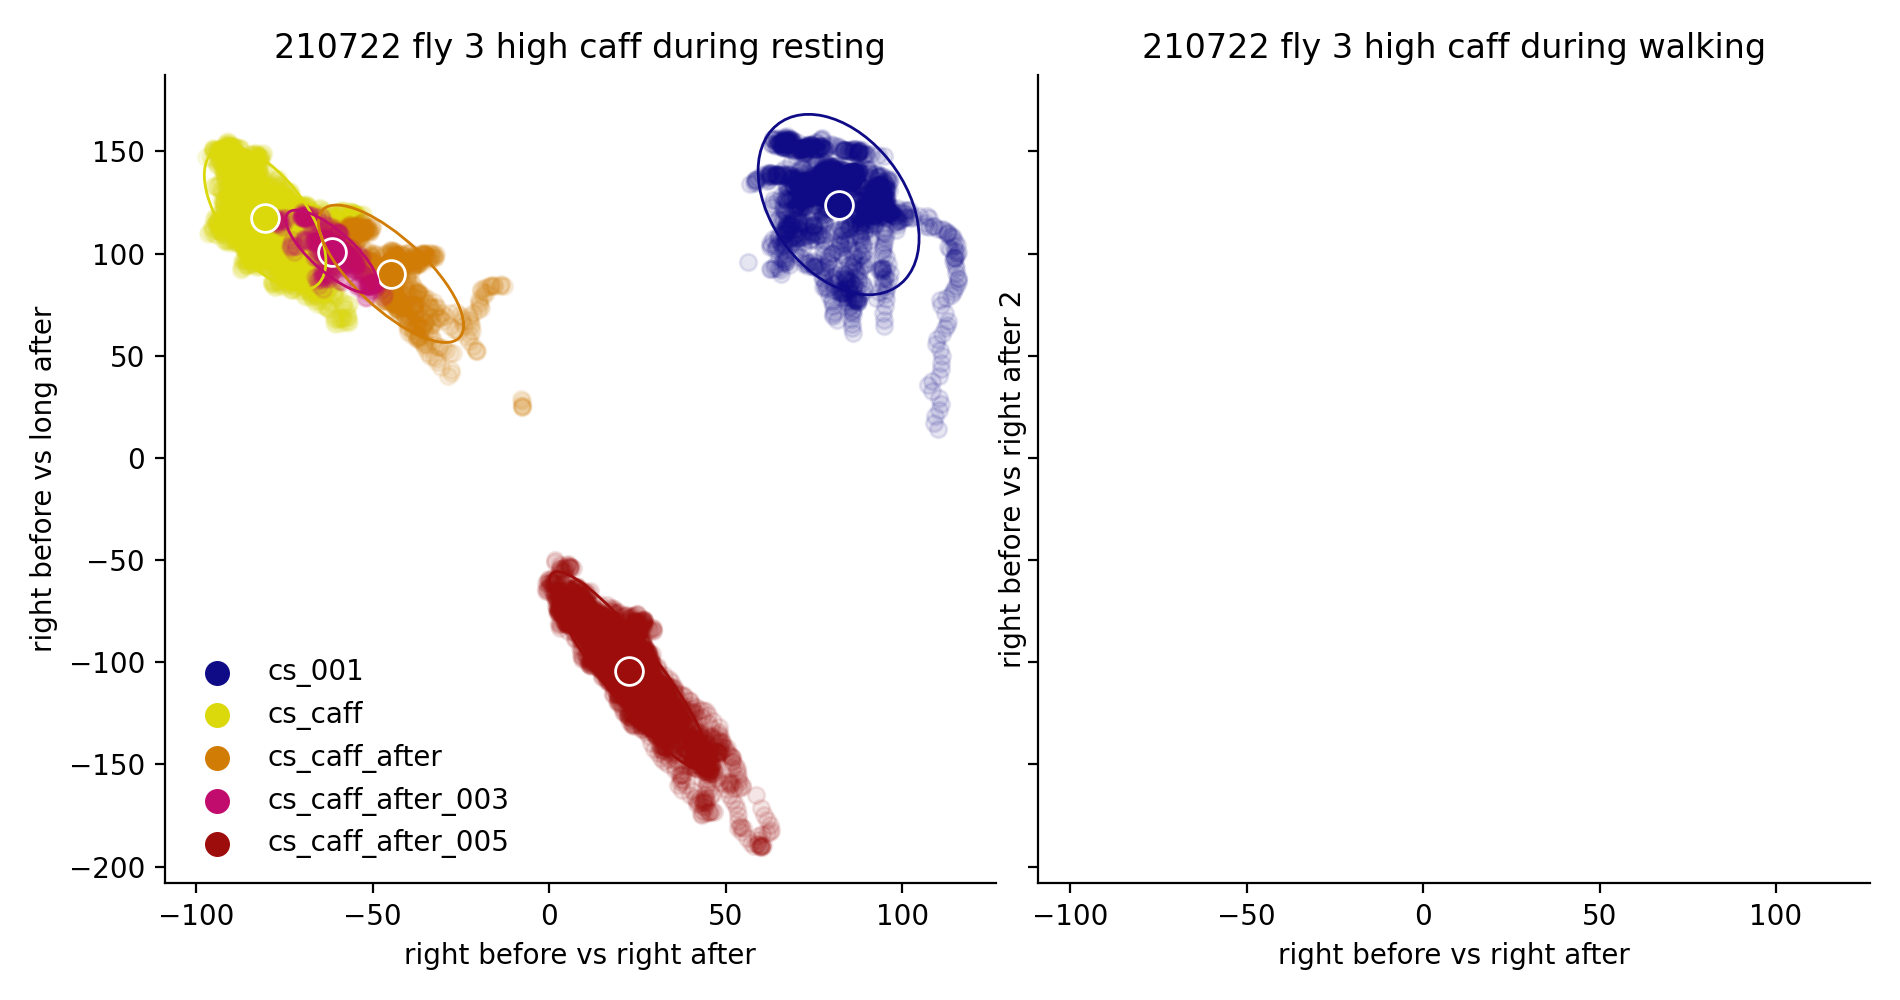

could not apply tight layout.


In [35]:
%matplotlib notebook

# colors_long = [myplt.BLACK, myplt.DARKBLUE, myplt.DARKGREEN, myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED]
# colors_contrast_long = [myplt.DARKGRAY, myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN_CONTRAST, myplt.DARKPINK, myplt.DARKPURPLE, myplt.DARKBROWN]
colors_long = [myplt.DARKBLUE,  # myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN, # myplt.DARKGREEN_CONTRAST, 
          myplt.DARKYELLOW, myplt.DARKORANGE,myplt.DARKPINK, myplt.DARKRED, myplt.DARKPURPLE]
colors_contrast_long = colors_long
# colors = [myplt.DARKBLUE, myplt.DARKYELLOW, myplt.DARKRED]
# colors_contrast = [myplt.DARKBLUE_CONTRAST,myplt.DARKPINK, myplt.DARKBROWN]
# order = [0,4,1,5,2,3]

fig, axs = plt.subplots(1,2, figsize=(9.5,5), sharey=True, sharex=True)  # , sharex="col", sharey="col")

short_bef = 0
right_aft = 1
med_aft = 2
long_aft = 5
trials = [0,1,2,3,4]  # 5

an.plot_proj_scatter(w_1=pcan.w_inter_pca_rest_pixels[short_bef,right_aft], w_2=pcan.w_inter_pca_rest_pixels[short_bef,long_aft],
             X_trials=pcan.pixels_rest, trials=trials, w_names=["right before vs right after", "right before vs long after"],
             X_names=pcan.trial_names, 
             fig=fig, ax=axs[0], alpha=0.1, name=pcan.condition+" during resting",colors=colors_contrast_long)

an.plot_proj_scatter(w_1=pcan.w_inter_pca_walk_pixels[short_bef,right_aft], w_2=pcan.w_inter_pca_walk_pixels[short_bef,long_aft],
             X_trials=pcan.pixels_walk, trials=trials, w_names=["right before vs right after", "right before vs right after 2"],
             X_names=pcan.trial_names, 
             fig=fig, ax=axs[1], alpha=0.1, name=pcan.condition+" during walking",colors=colors_long)

# fig.suptitle("Inter Condition PCA")
# fig.tight_layout()

In [28]:
frac_rest = [np.mean(r) for r in pcan.rest]
frac_rest

[0.6536458333333334,
 0.13385416666666666,
 0.25026041666666665,
 0.9375,
 0.9822916666666667,
 0.99296875]

In [29]:
frac_walk = [np.mean(r) for r in pcan.walk]
frac_walk

[0.12578125, 0.029427083333333333, 0.07682291666666667, 0.0, 0.0, 0.0]

# plot waves

In [6]:
import utils2p

In [7]:
from longterm.utils import readlines_tolist

In [51]:
i_fly = 3
fly_dir = fly_dirs[i_fly]
condition = ["210722 fly 3 high caff",
             "210721 fly 3 high caff",
             "210723 fly 1 low caff",
             "210723 fly 2 high caff"
            ][i_fly]

i_trials = [
        [1,4,5,8,10,12],
        [1,4,5,8,10,12],
        [1,4,5,8,10,12],
        [1,5,6,9,11,12]
    ][i_fly]

In [52]:
all_trial_dirs = readlines_tolist(os.path.join(fly_dir, "trial_dirs.txt"))
trial_dirs = [this_dir for i_trial, this_dir in enumerate(all_trial_dirs) if i_trial in i_trials]
trial_dirs

['/mnt/NAS2/LH/210723/fly2/cs_001',
 '/mnt/NAS2/LH/210723/fly2/cs_caff_001',
 '/mnt/NAS2/LH/210723/fly2/cs_caff_after',
 '/mnt/NAS2/LH/210723/fly2/cs_caff_after_003',
 '/mnt/NAS2/LH/210723/fly2/cs_caff_after_005',
 '/mnt/NAS2/LH/210723/fly2/cs_caff_after_006']

In [53]:
trial_names = []
for trial_dir in trial_dirs:
    _, name = os.path.split(trial_dir)
    trial_names.append(name)

In [54]:
green_dirs = [os.path.join(trial_dir, "processed", "green_denoised_t1.tif") for trial_dir in trial_dirs]
greens = [utils.get_stack(green_dir) for green_dir in green_dirs]

In [55]:
green_means = np.array([np.mean(green, axis=(1,2)) for green in greens]).T

<IPython.core.display.Javascript object>


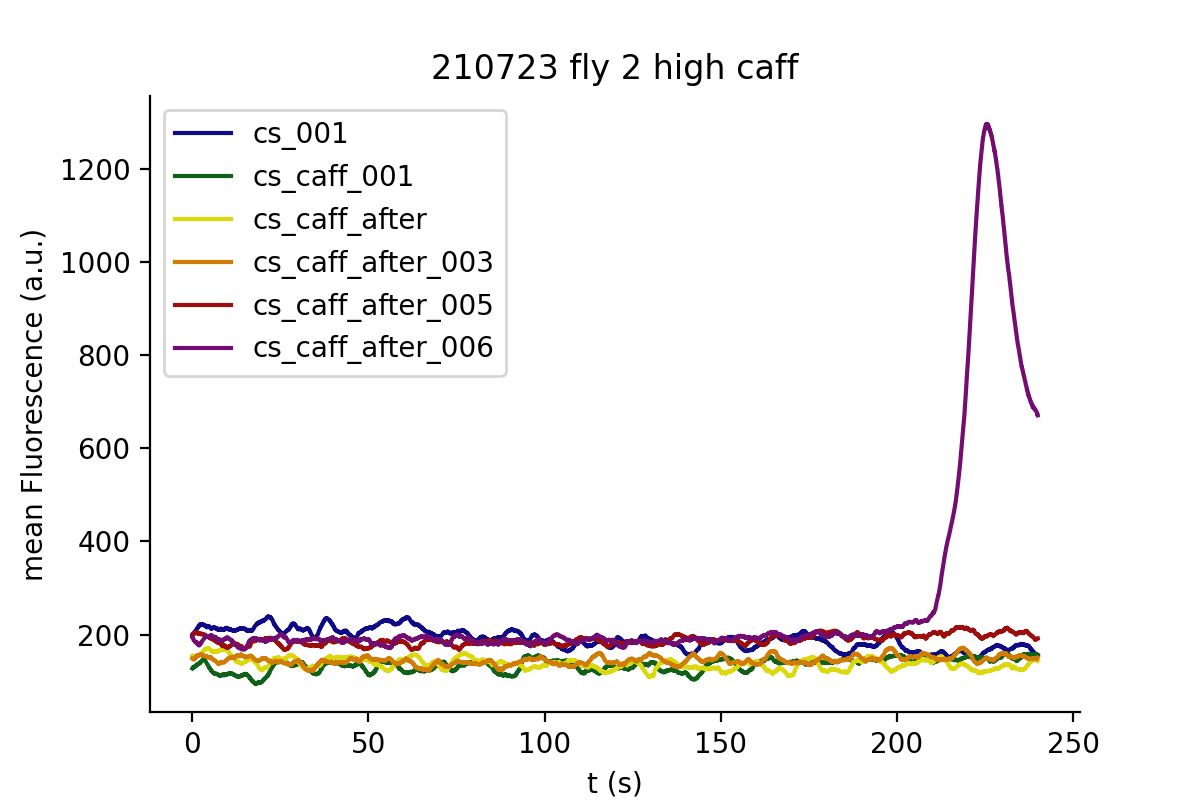

In [56]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(6,4))

colors_long = [myplt.DARKBLUE, myplt.DARKGREEN, # myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN, # myplt.DARKGREEN_CONTRAST, 
          myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED, myplt.DARKPURPLE]

t = np.arange(len(green_means)) / 16
for line, c, name in zip(green_means.T, colors_long, trial_names):
    ax.plot(t, line, color=c, label=name)
    
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("mean Fluorescence (a.u.)")
ax.set_title(condition)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)